In [40]:
import albumentations as A
import torchvision
import numpy as np
import torchvision.transforms as T
import cv2
import matplotlib.pyplot as plt
from albumentations.core.transforms_interface import ImageOnlyTransform

In [46]:
class Dilation(ImageOnlyTransform):
    def apply(self, img, **params):
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, tuple(np.random.randint(1, 2, 2)))
        img = cv2.dilate(img, kernel, iterations=1)
        return img
    
class ToBlackAndWhite(ImageOnlyTransform):
    def apply(self, img, **params):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        return img/255

In [69]:
train_dataset_path = '../dataset/handwritten_math_symbols/train/'
eval_dataset_path = '../dataset/handwritten_math_symbols/eval/'
crohme_dataset_path = '../dataset/crohm_symbols/'

In [71]:
train_dataset = torchvision.datasets.ImageFolder(root=train_dataset_path)
eval_dataset = torchvision.datasets.ImageFolder(root=eval_dataset_path)
crohme_dataset = torchvision.datasets.ImageFolder(root=crohme_dataset_path)

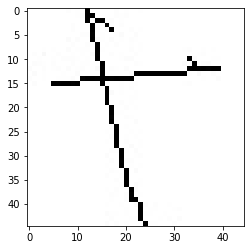

In [83]:
crohm_img = crohme_dataset[3332][0]
plt.imshow(np.array(crohm_img))

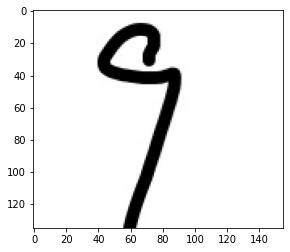

In [4]:
img = train_dataset[3510][0]
plt.imshow(np.array(img)/255)

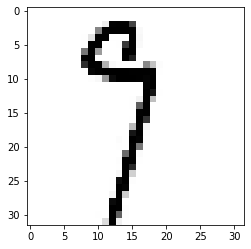

In [5]:
resized_img = A.Resize(width=32, height=32)(image=((np.array(img))))['image']
plt.imshow(resized_img)

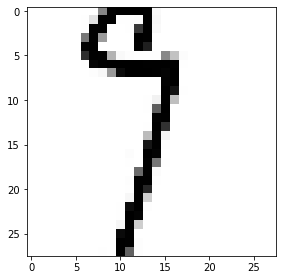

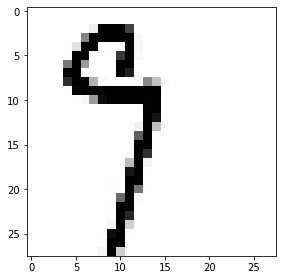

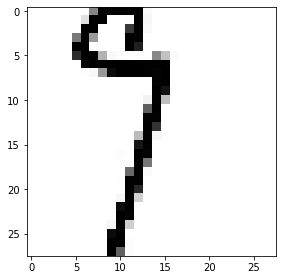

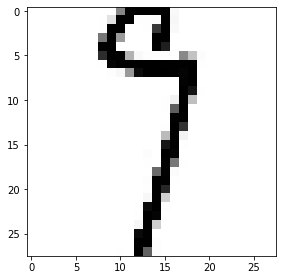

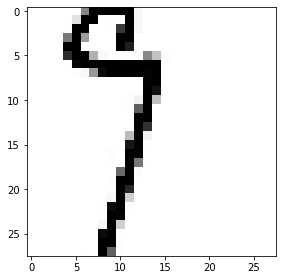

In [93]:
for i in range(5):
    plt.imshow(A.RandomCrop(width=28, height=28)(image=np.array(resized_img))['image'])
    plt.tight_layout()
    plt.show()

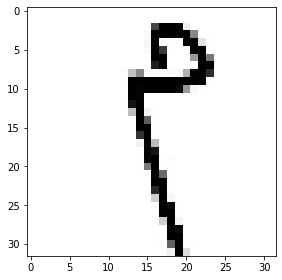

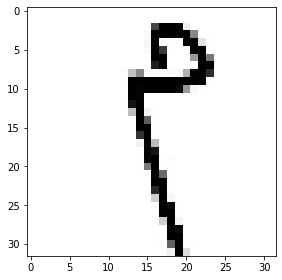

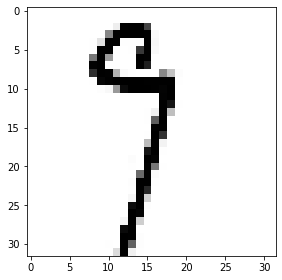

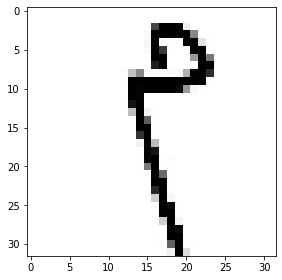

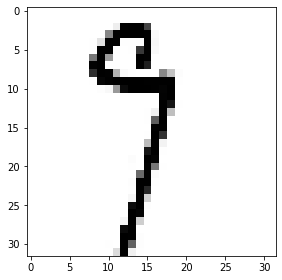

In [98]:
# not needed
for i in range(5):
    plt.imshow(A.HorizontalFlip(p=0.5)(image=np.array(resized_img))['image'])
    plt.tight_layout()
    plt.show()

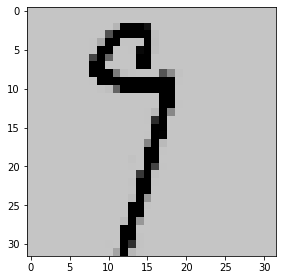

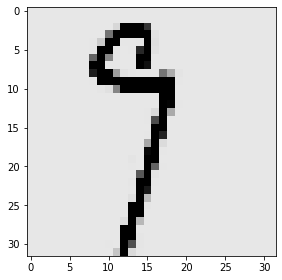

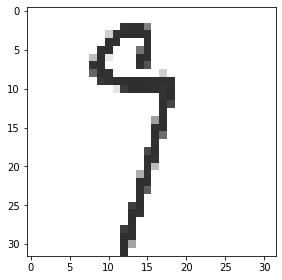

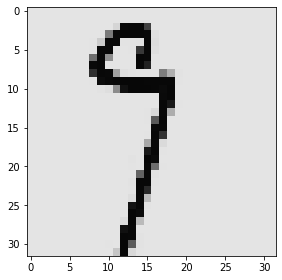

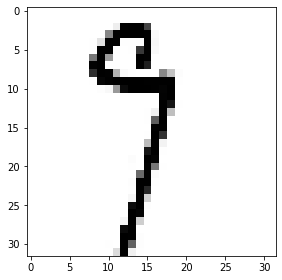

In [101]:
# not useful
for i in range(5):
    plt.imshow(A.RandomBrightnessContrast(p=0.7)(image=np.array(resized_img))['image'])
    plt.tight_layout()
    plt.show()

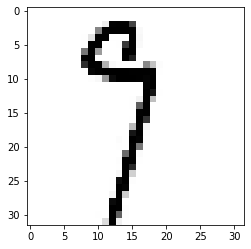

In [109]:
gray_img = A.ToGray()(image=((np.array(resized_img))))['image']
plt.imshow(gray_img)

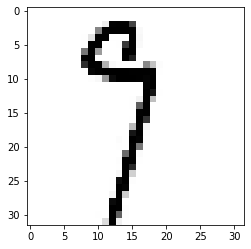

In [191]:
# No Use
plt.imshow(A.RandomContrast()(image=((np.array(resized_img))))['image'])

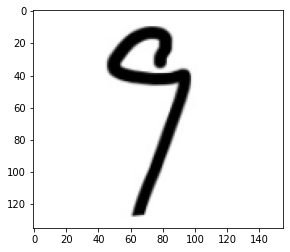

In [423]:
plt.imshow(A.Perspective(scale=(0.08, 0.1),p=1, fit_output=True, pad_val=(255, 255, 255))(image=nimg)['image'])

In [319]:
nimg = np.array(img)

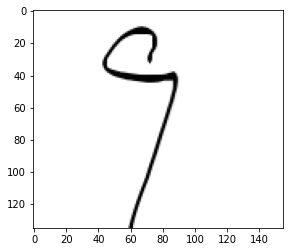

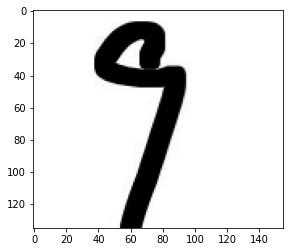

In [328]:
kernel = np.ones((4, 6), np.uint8)
 
# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(nimg, kernel, iterations=1)
img_dilation = cv2.dilate(nimg, kernel, iterations=1) plt.imshow(img_dilation) plt.show()
plt.imshow(img_erosion)
plt.show()

In [330]:
A.Resize(width=32, height=32)(image=((np.array(img))))

{'image': array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255,

In [7]:
T.RandomPerspective(distortion_scale=0.6, p=1, fill=255)(img).__str__

<method-wrapper '__str__' of Image object at 0x7fc629487250>

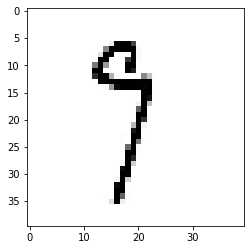

In [16]:
plt.imshow(A.PadIfNeeded(40, 40, p=1, value=(255,255, 255), border_mode=cv2.BORDER_CONSTANT)(image=np.array(resized_img))['image'])

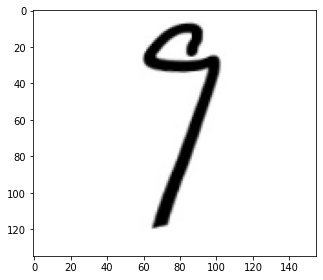

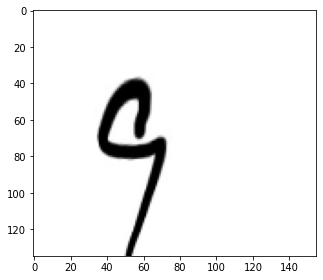

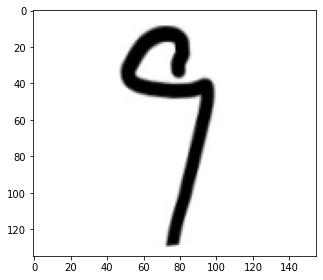

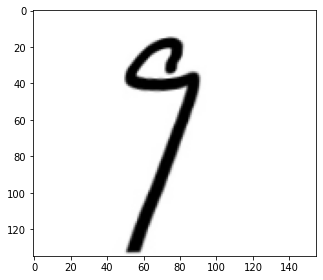

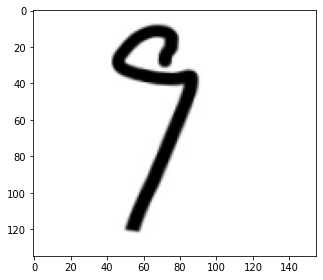

In [38]:
for i in range(5):
    plt.imshow(A.Perspective(scale=(0.15, 0.15),p=1, fit_output=True, pad_val=(255, 255, 255))(image=np.array(img))['image'])


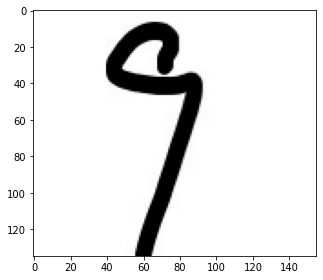

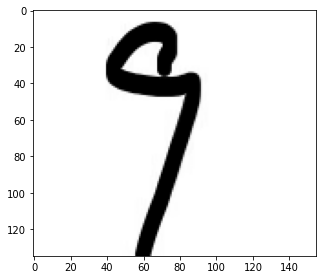

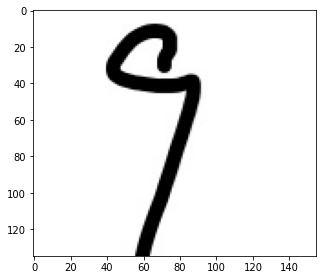

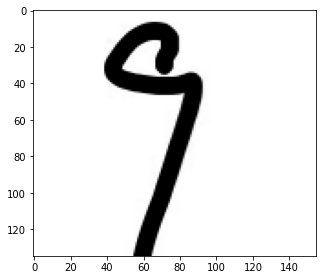

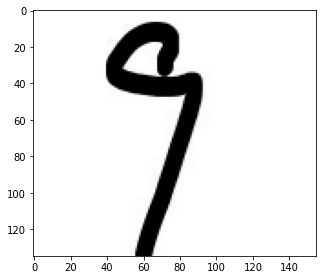

In [47]:
class Erosin(ImageOnlyTransform):
    def apply(self, img, **params):
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, tuple(np.random.randint(1, 6, 2)))
        img = cv2.erode(img, kernel, iterations=1)
        return img
    
for i in range(5):
    plt.imshow(Erosin(p=1)(image=np.array(img))['image'])
    plt.tight_layout()
    plt.show()

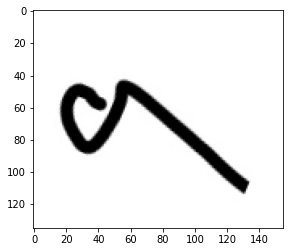

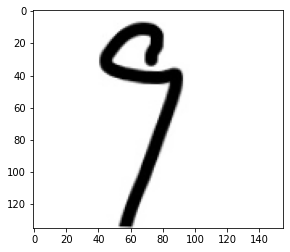

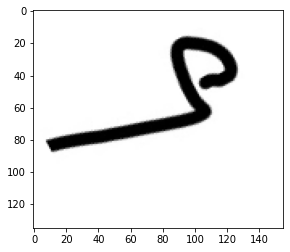

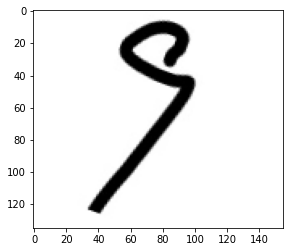

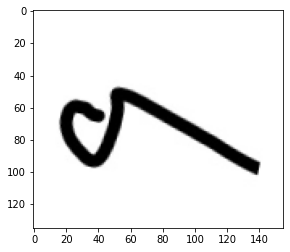

In [58]:
for i in range(5):
    plt.imshow(A.Rotate(limit=80,p=1, value=(255,255, 255), border_mode=cv2.BORDER_CONSTANT)(image=np.array(img))['image'])
    plt.show()

In [63]:
A.ElasticTransform?

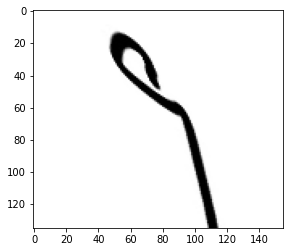

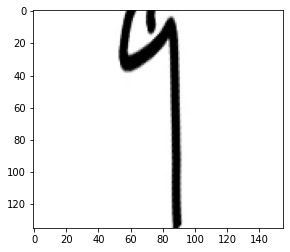

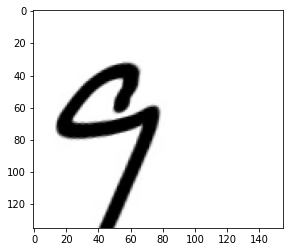

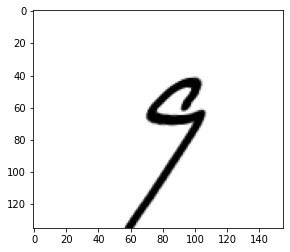

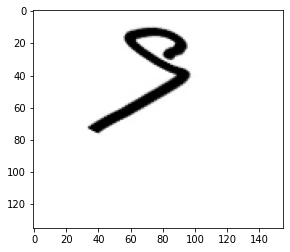

In [68]:
for i in range(5):
    plt.imshow(A.ElasticTransform(
        value=(255,255, 255),
        alpha=10,
        sigma=50,
        alpha_affine=50,
        interpolation=1,
        border_mode=cv2.BORDER_CONSTANT,
        p=1
    )(image=np.array(img))['image'])
    plt.show()

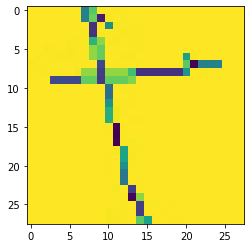

In [100]:
plt.imshow(Dilation()(image=cv2.resize(cv2.cvtColor(np.array(crohm_img), cv2.COLOR_BGR2GRAY), (28, 28)))['image'])